In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

hz_file = f'sample_data/{[file for file in sorted(os.listdir('sample_data')) if 'hz' in file][-1]}'
ticklist_file = f'sample_data/{[file for file in sorted(os.listdir('sample_data')) if 'ticklist' in file][-1]}'
filtered_file = f'sample_data/{[file for file in sorted(os.listdir('sample_data')) if 'frequency' in file][-1]}'

In [2]:
HALL_GALLONS_PER_TICK = 0.0009

## Hall frequency

In [3]:
def plot_hall_freq(df):
    fig, ax = plt.subplots(1,1)
    ax2 = ax.twinx()
    ax.plot(df.timestamp, df.frequency)
    ax2.plot(df.timestamp, df.gpm)
    ax.set_title('Hall frequency - from ticklist')
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency [Hz]')
    ax2.set_ylabel('GPM (calculated from gallons per tick)')
    plt.show()

### From ticklist

,timestamp,tick_delta_us,frequency
0,1.729280e+09,81658,12.25
1,1.729280e+09,43626,22.92
2,1.729280e+09,38622,25.89
3,1.729280e+09,38110,26.24
4,1.729280e+09,43337,23.07


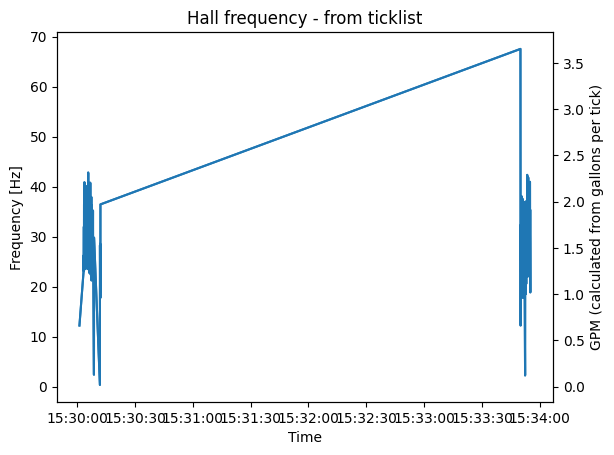

In [4]:
if os.path.exists(ticklist_file):
    
    df_ticklist = pd.read_csv(ticklist_file)
    display(df_ticklist.head())
    
    df_ticklist['timestamp'] = pd.to_datetime(list(df_ticklist['timestamp']), unit='s', utc=True).tz_convert('America/New_York')
    df_ticklist['gpm'] = [round(1e6/x * HALL_GALLONS_PER_TICK * 60, 2) for x in list(df_ticklist['tick_delta_us'])] 

    plot_hall_freq(df_ticklist)

### After filtering

,timestamp,frequency
0,1.729280e+09,12.246181
1,1.729280e+09,13.007832
2,1.729280e+09,13.719903
3,1.729280e+09,14.235896
4,1.729280e+09,14.786927


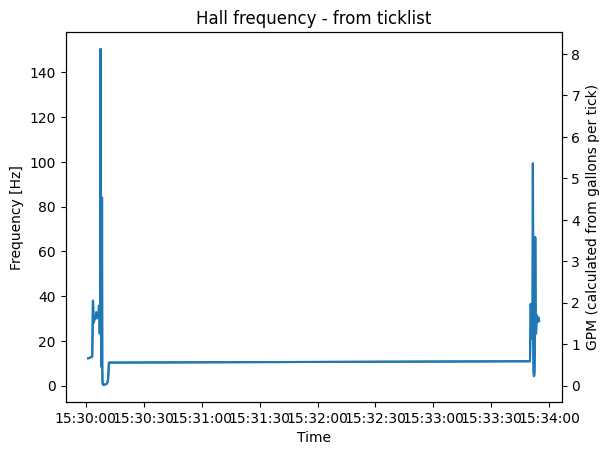

In [5]:
if os.path.exists(filtered_file):

    df_filtered = pd.read_csv(filtered_file)
    display(df_filtered.head())

    df_filtered['timestamp'] = pd.to_datetime(list(df_filtered['timestamp']), unit='s', utc=True).tz_convert('America/New_York')
    df_filtered['gpm'] = [round(x * HALL_GALLONS_PER_TICK * 60, 2) for x in list(df_filtered['frequency'])] 
    
    plot_hall_freq(df_filtered)

### Hz reports

,timestamp,frequency
0,1.729280e+09,0.000
1,1.729280e+09,12.246
2,1.729280e+09,13.410
3,1.729280e+09,14.615
4,1.729280e+09,15.723


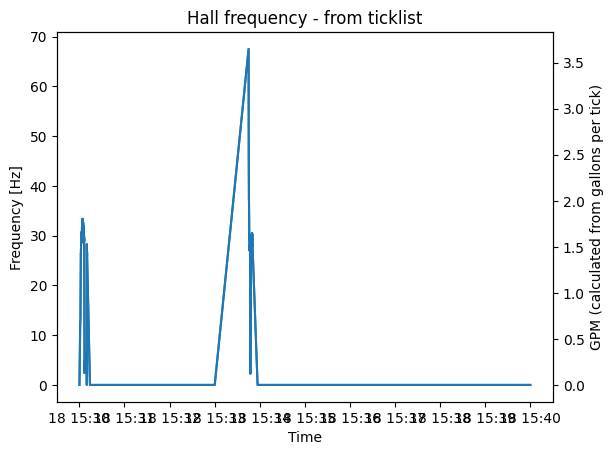

In [6]:
if os.path.exists(hz_file):

    df_hz = pd.read_csv(hz_file)
    display(df_hz.head())

    df_hz['timestamp'] = pd.to_datetime(list(df_hz['timestamp']), unit='s', utc=True).tz_convert('America/New_York')
    df_hz['gpm'] = [round(x * HALL_GALLONS_PER_TICK * 60, 2) for x in list(df_hz['frequency'])] 

    plot_hall_freq(df_hz)

### All three

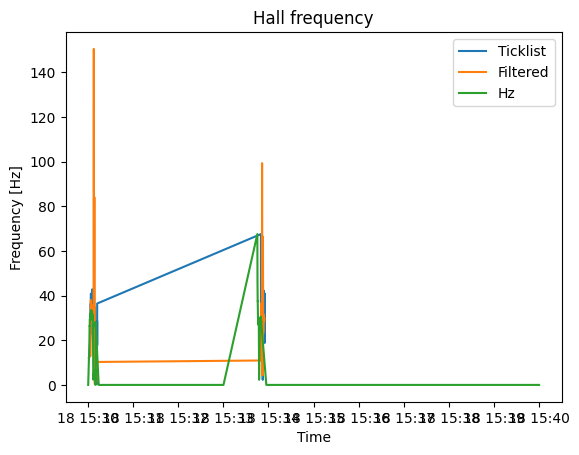

In [7]:
fig, ax = plt.subplots(1,1)
if os.path.exists(ticklist_file):
    ax.plot(df_ticklist.timestamp, df_ticklist.frequency, label='Ticklist')
if os.path.exists(filtered_file):
    ax.plot(df_filtered.timestamp, df_filtered.frequency, label='Filtered')
if os.path.exists(hz_file):
    ax.plot(df_hz.timestamp, df_hz.frequency, label='Hz')
ax.set_title('Hall frequency')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency [Hz]')
ax.legend()
plt.show()